In [1]:
# library imports
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('./breast+cancer+wisconsin+diagnostic/wdbc.data')

# Gain some stats
df.describe(include='all')

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
count,5.680000e+02,568,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.042382e+07,NaN,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,NaN,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,NaN,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,NaN,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,NaN,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065


In [3]:
# Define column names
new_column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                    'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                    'fractal_dimension_se', 'radius_worst', 'texture_worst',
                    'perimeter_worst', 'area_worst', 'smoothness_worst',
                    'compactness_worst', 'concavity_worst', 'concave points_worst',
                    'symmetry_worst', 'fractal_dimension_worst']

# Add column names
df.columns = new_column_names
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# Check for Nans
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# Encode the label: 0 for benign and 1 for malignant
encode_diagnosis = {'B': 0, 'M': 1}

df['diagnosis'] = df['diagnosis'].replace(encode_diagnosis)

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
# Split the data to features and labels
X = df.drop("diagnosis", axis = 1)
Y = df["diagnosis"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
563    1
564    1
565    1
566    1
567    0
Name: diagnosis, Length: 568, dtype: int64

# Define Helper Functions

In [7]:
def fit_model(X, Y):
    
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    model.fit(X, Y)
    
    return model

In [8]:
def calculate_metrics(model, X_test_scaled, Y_test):

    # Get model predictions
    y_predict = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics 
    acc = accuracy_score(Y_test, y_predict)
    roc = roc_auc_score(Y_test, y_predict)
    prec = precision_score(Y_test, y_predict)
    rec = recall_score(Y_test, y_predict)
    f1 = f1_score(Y_test, y_predict)
    
    return acc, roc, prec, rec, f1

In [9]:
def data_preparation(X, Y):
    
    # Split data to train/test 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)

    # Normalize
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return (X_train_scaled, X_test_scaled, Y_train, Y_test)

In [10]:
def train_and_get_metrics(X, Y):
    
    X_train_scaled, X_test_scaled, Y_train, Y_test = data_preparation(X,Y)
    
    # Train the model
    model = fit_model(X_train_scaled, Y_train)

    # Make predictions on test dataset and calculate metrics.
    acc, roc, prec, rec, f1 = calculate_metrics(model, X_test_scaled, Y_test)

    return acc, roc, prec, rec, f1

In [11]:
def evaluate_model_on_features(X, Y):

    # Call function
    acc, roc, prec, rec, f1 = train_and_get_metrics(X, Y)

    # Construct a dataframe to display metrics.
    results = pd.DataFrame([[acc, roc, prec, rec, f1, X.shape[1]]], columns=["Accuracy", "ROC", "Precision", "Recall", "F1 Score", 'Feature Count'])
    
    return results

# Baseline

In [12]:
# Calculate evaluation metrics
df_baseline = evaluate_model_on_features(X, Y)
df_baseline.index = ['All features']

# Initialize results dataframe
results = df_baseline

# Check the metrics
results

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.962302,0.952381,0.952381,0.952381,31


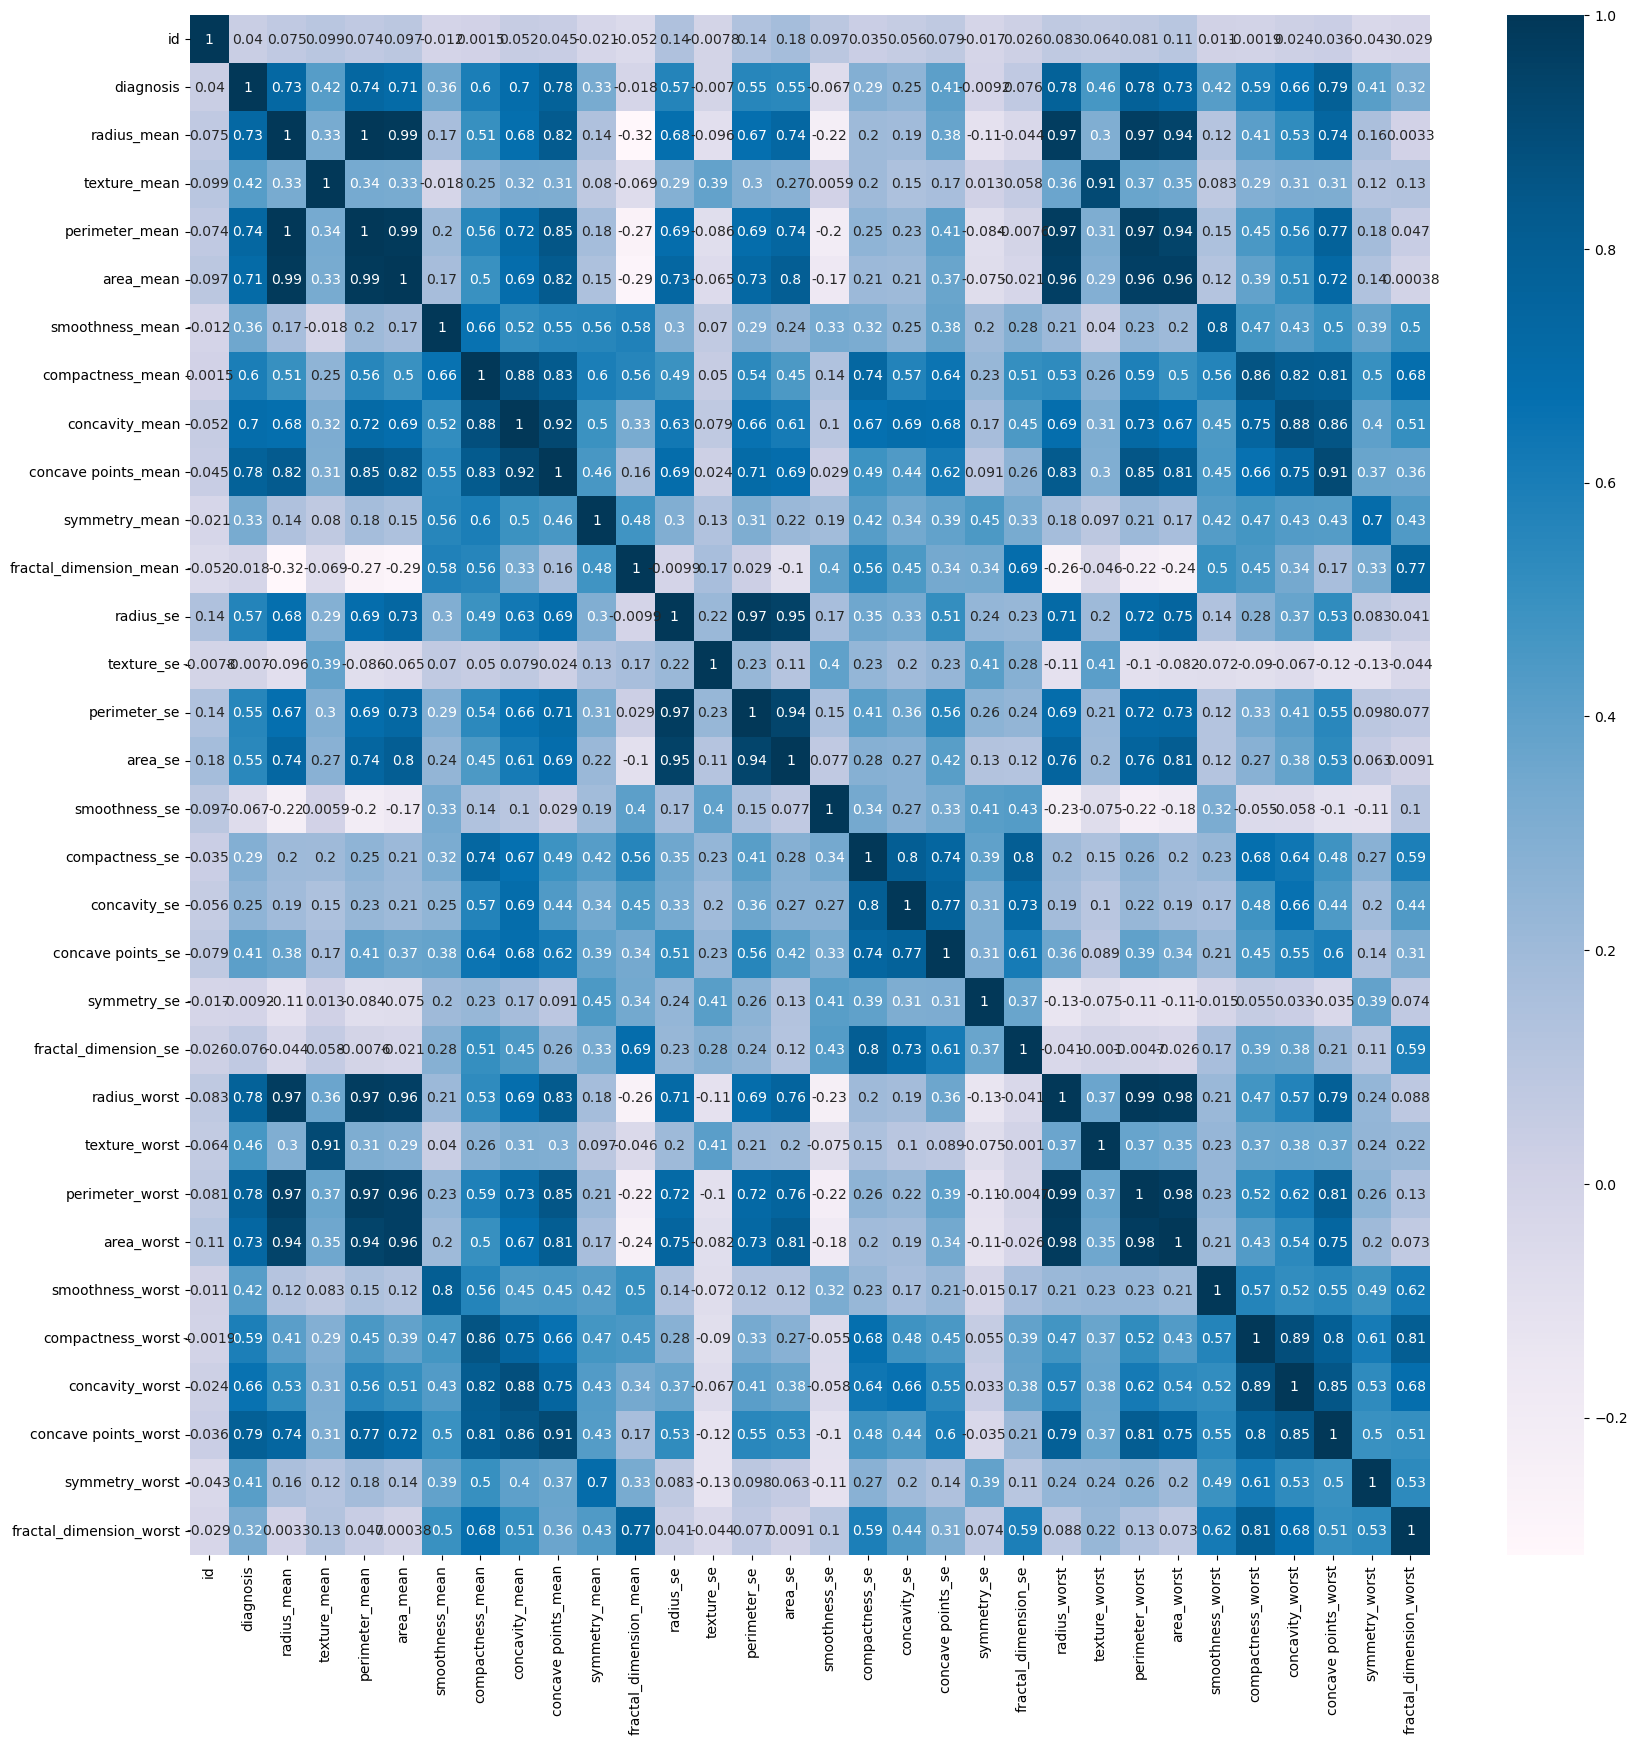

In [13]:
# Correlation Matrix

plt.figure(figsize=(20,20))

# Calculate correlation matrix
cor = df.corr() 

# Plot
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

# Filter Methods

There are different ways to calculate the scores for each feature:
    
Pearson Correlation (numeric features - numeric target, exception: when label is binary),
ANOVA f-test (numeric features - categorical target), 
Chi-squared (categorical features - categorical target)

In [14]:
cor_target = abs(cor["diagnosis"])
cor_target

id                         0.040370
diagnosis                  1.000000
radius_mean                0.729376
texture_mean               0.422146
perimeter_mean             0.741887
area_mean                  0.708389
smoothness_mean            0.356276
compactness_mean           0.595587
concavity_mean             0.695648
concave points_mean        0.776369
symmetry_mean              0.327336
fractal_dimension_mean     0.018099
radius_se                  0.565373
texture_se                 0.007024
perimeter_se               0.554416
area_se                    0.546343
smoothness_se              0.066629
compactness_se             0.290866
concavity_se               0.252567
concave points_se          0.407293
symmetry_se                0.009170
fractal_dimension_se       0.076068
radius_worst               0.775725
texture_worst              0.461443
perimeter_worst            0.782470
area_worst                 0.732925
smoothness_worst           0.419731
compactness_worst          0

In [15]:
# Keep Features that are strongly correlated with the label.

# Get the absolute value of the correlation
cor_target = abs(cor["diagnosis"])

# Highly correlated features with thresold = 0.2
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [16]:
# Call function
strong_features_eval_df = evaluate_model_on_features(df[names], Y)
strong_features_eval_df.index = ['Strong features']

# concat to results df
results = pd.concat([results, strong_features_eval_df])

results

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.962302,0.952381,0.952381,0.952381,31
Strong features,0.956140,0.960317,0.911111,0.976190,0.942529,25


In [17]:
# Elimintae features that can be represented by other features
# radius_mean is highly correlated to some other features including: radius worst, perimeter_worst, and area_worst

subset_feature_corr_names = [x for x in names if x not in ['radius_worst', 'perimeter_worst', 'area_worst']]

# Call function
subset_feature_eval_df = evaluate_model_on_features(df[subset_feature_corr_names], Y)
subset_feature_eval_df.index = ['Subset features']

# Append to results and display
results = pd.concat([results, subset_feature_eval_df])
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.962302,0.952381,0.952381,0.952381,31
Strong features,0.956140,0.960317,0.911111,0.976190,0.942529,25
Subset features,0.982456,0.986111,0.954545,1.000000,0.976744,22


In [19]:
# Univariate selection

def univariate_selection():
    
    # call function for preparing the data
    X_train_scaled, X_test_scaled, Y_train, Y_test = data_preparation(X,Y)
    
    # Select top 20 features based on f-test
    selector = SelectKBest(f_classif, k=20)
    
    # Fit to scaled data, then transform it
    X_new = selector.fit_transform(X_train_scaled, Y_train)
    
    # Print the results
    feature_idx = selector.get_support()
    for name, included in zip(df.drop("diagnosis", axis = 1 ).columns, feature_idx):
        print("%s: %s" % (name, included))
    
    # Drop the target variable
    feature_names = df.drop("diagnosis", axis = 1 ).columns[feature_idx]
    
    return feature_names


univariate_feature_names = univariate_selection()

id: False
radius_mean: True
texture_mean: True
perimeter_mean: True
area_mean: True
smoothness_mean: False
compactness_mean: True
concavity_mean: True
concave points_mean: True
symmetry_mean: False
fractal_dimension_mean: False
radius_se: True
texture_se: False
perimeter_se: True
area_se: True
smoothness_se: False
compactness_se: False
concavity_se: False
concave points_se: True
symmetry_se: False
fractal_dimension_se: False
radius_worst: True
texture_worst: True
perimeter_worst: True
area_worst: True
smoothness_worst: True
compactness_worst: True
concavity_worst: True
concave points_worst: True
symmetry_worst: True
fractal_dimension_worst: False


In [20]:
# Calculate and check model metrics
univariate_eval_df = evaluate_model_on_features(df[univariate_feature_names], Y)
univariate_eval_df.index = ['F-test']

# concat to results df
results = pd.concat([results, univariate_eval_df])

results

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.962302,0.952381,0.952381,0.952381,31
Strong features,0.956140,0.960317,0.911111,0.976190,0.942529,25
Subset features,0.982456,0.986111,0.954545,1.000000,0.976744,22
F-test,0.956140,0.960317,0.911111,0.976190,0.942529,20


# Wrapper Methods

In [23]:
def run_rfe():

    # call function for preparing the data
    X_train_scaled, X_test_scaled, Y_train, Y_test = data_preparation(X,Y)
    
    # Define the model
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    
    # Wrap RFE around the model
    rfe = RFE(model, n_features_to_select=20)
    
    # Fit RFE
    rfe = rfe.fit(X_train_scaled, Y_train)
    feature_names = df.drop("diagnosis", axis = 1 ).columns[rfe.get_support()]
    
    return feature_names

rfe_feature_names = run_rfe()

In [24]:
# Calculate and check model metrics
rfe_eval_df = evaluate_model_on_features(df[rfe_feature_names], Y)
rfe_eval_df.index = ['RFE']

# concat to results df
results = pd.concat([results, rfe_eval_df])

results

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.962302,0.952381,0.952381,0.952381,31
Strong features,0.956140,0.960317,0.911111,0.976190,0.942529,25
Subset features,0.982456,0.986111,0.954545,1.000000,0.976744,22
F-test,0.956140,0.960317,0.911111,0.976190,0.942529,20
RFE,0.964912,0.962302,0.952381,0.952381,0.952381,20


# Embedded Methods

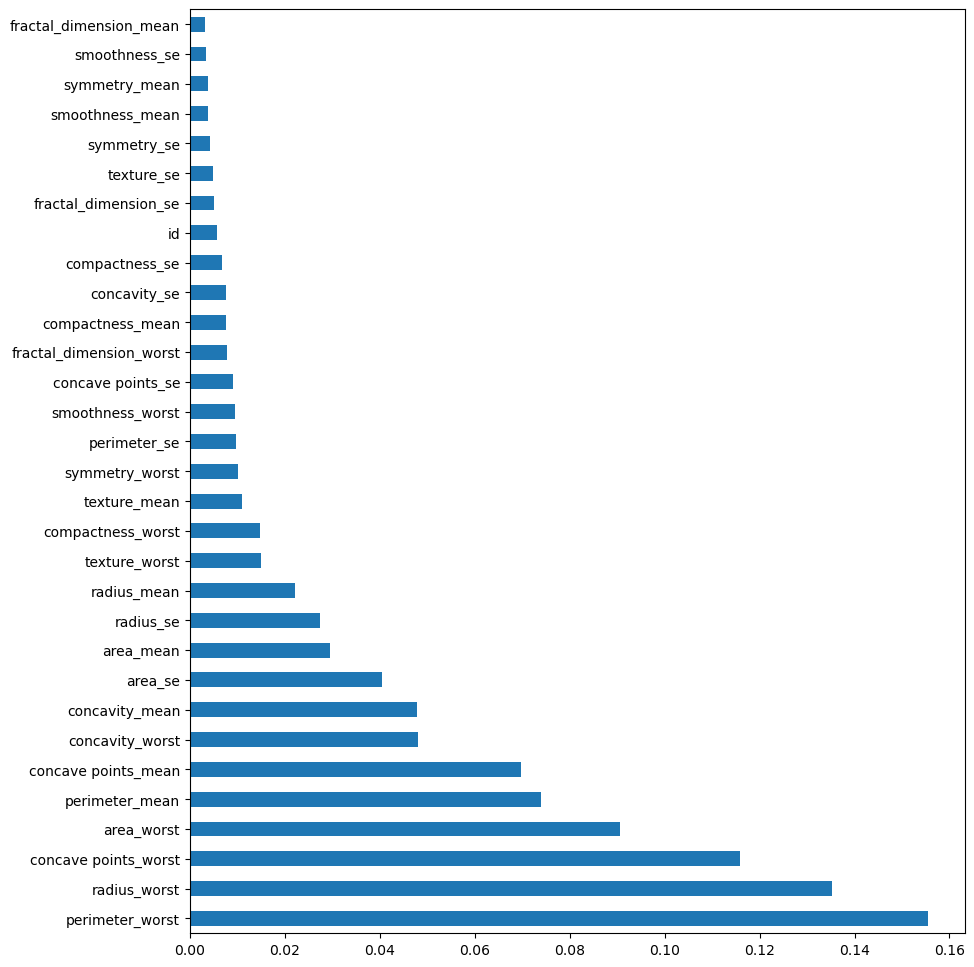

In [25]:
def feature_importances_from_tree_based_model_():
    
    # call function for preparing the data
    X_train_scaled, X_test_scaled, Y_train, Y_test = data_preparation(X,Y)
    
    model = RandomForestClassifier()
    model = model.fit(X_train_scaled,Y_train)
    
    # Plot feature importance
    plt.figure(figsize=(10, 12))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.sort_values(ascending=False).plot(kind='barh')
    plt.show()
    
    return model


def select_features_from_model(model):
    
    model = SelectFromModel(model, prefit=True, threshold=0.013)
    feature_idx = model.get_support()
    feature_names = df.drop("diagnosis", axis = 1 ).columns[feature_idx]
        
    return feature_names

model = feature_importances_from_tree_based_model_()
feature_imp_feature_names = select_features_from_model(model)

In [26]:
# Calculate and check model metrics
feat_imp_eval_df = evaluate_model_on_features(df[feature_imp_feature_names], Y)
feat_imp_eval_df.index = ['Feature Importance']

# concat to results df
results = pd.concat([results, feat_imp_eval_df])

results

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.962302,0.952381,0.952381,0.952381,31
Strong features,0.956140,0.960317,0.911111,0.976190,0.942529,25
Subset features,0.982456,0.986111,0.954545,1.000000,0.976744,22
F-test,0.956140,0.960317,0.911111,0.976190,0.942529,20
RFE,0.964912,0.962302,0.952381,0.952381,0.952381,20
Feature Importance,0.964912,0.967262,0.931818,0.976190,0.953488,14


# L1 Regularization

In [27]:
def run_l1_regularization():
    
    # call function for preparing the data
    X_train_scaled, X_test_scaled, Y_train, Y_test = data_preparation(X,Y)
    
    # Select L1 regulated features from LinearSVC output 
    selection = SelectFromModel(LinearSVC(C=1, penalty='l1', dual=False))
    selection.fit(X_train_scaled, Y_train)

    feature_names = df.drop("diagnosis",axis = 1 ).columns[(selection.get_support())]
    
    return feature_names

l1reg_feature_names = run_l1_regularization()

In [28]:
# Calculate and check model metrics
l1reg_eval_df = evaluate_model_on_features(df[l1reg_feature_names], Y)
l1reg_eval_df.index = ['L1 Reg']

# concat to results df
results = pd.concat([results, l1reg_eval_df])

results

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.962302,0.952381,0.952381,0.952381,31
Strong features,0.956140,0.960317,0.911111,0.976190,0.942529,25
Subset features,0.982456,0.986111,0.954545,1.000000,0.976744,22
F-test,0.956140,0.960317,0.911111,0.976190,0.942529,20
RFE,0.964912,0.962302,0.952381,0.952381,0.952381,20
Feature Importance,0.964912,0.967262,0.931818,0.976190,0.953488,14
L1 Reg,0.973684,0.974206,0.953488,0.976190,0.964706,20
